<a href="https://colab.research.google.com/github/AnnaVashuk/mts/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import umap
from umap.plot import connectivity as umap_connectivity

## Data

In [ ]:
path = "/content/drive/MyDrive/forestfires.csv"
forestfires = pd.read_csv(path)

In [ ]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
columns_to_drop = ['X', 'Y', 'month', 'day']
forestfires = forestfires.drop(columns=columns_to_drop)

## EDA

In [ ]:
print(f'Missing values in dataset: {forestfires.isna().sum().sum()}')
print('')
print(f'Duplicates in dataset: {forestfires.duplicated().sum()}, ({np.round(100*forestfires.duplicated().sum()/len(forestfires),1)}%)')
print('')
print(f'Data types: {forestfires.dtypes.unique()}')

Missing values in dataset: 0

Duplicates in dataset: 8, (1.5%)

Data types: [dtype('float64') dtype('int64')]


In [ ]:
forestfires = forestfires.drop_duplicates()

Preprocessing

In [ ]:
# отмасштабируем каждую фичу так, чтобы она имела среднее 0 и стандартное отклонение 1
SS = StandardScaler()

# применим масштабирование
X = pd.DataFrame(SS.fit_transform(forestfires), columns=forestfires.columns)

## PCA

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# преобразуем в датафрейм
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

print(principal_df.shape)
principal_df.head()

(509, 2)


,PC1,PC2
0,3.196467,-0.471303
1,0.194244,-0.672684
2,0.418689,-0.476867
3,2.887283,1.572779
4,2.511118,1.638050


Text(0, 0.5, 'PC2')

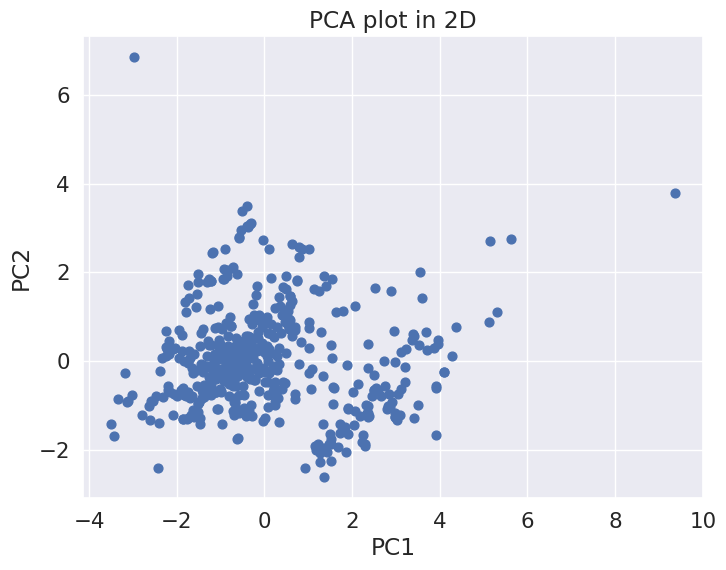

In [ ]:
# масштаб графика
plt.figure(figsize=(8,6))

# scatterplot (диаграмма рассеяния)
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# подписи осей/заголовок
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=2, n_init=15, max_iter=500, random_state=0)

# обучим K-means и получим предсказания
clusters = kmeans.fit_predict(X)

# центры кластеров
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

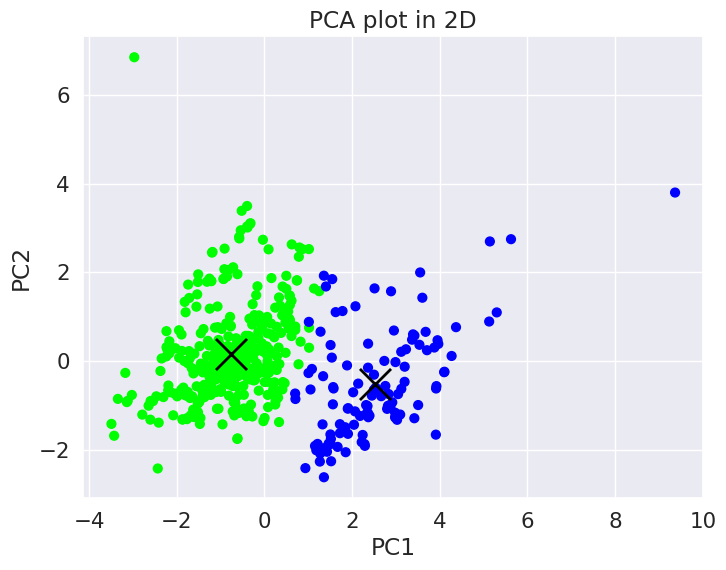

In [ ]:
# масштаб графика
plt.figure(figsize=(8,6))

# scatterplot (диаграмма рассеяния)
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=2, color="black")

# подписи осей/заголовок
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

## t-SNE

In [ ]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# преобразуем в датафрейм
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(509, 2)


,tsne comp. 1,tsne comp. 2
0,37.720573,-3.370331
1,1.012209,-15.696542
2,1.275604,-15.682025
3,29.154518,-0.440278
4,28.736235,-0.699179


Text(0, 0.5, 'tsne component 2')

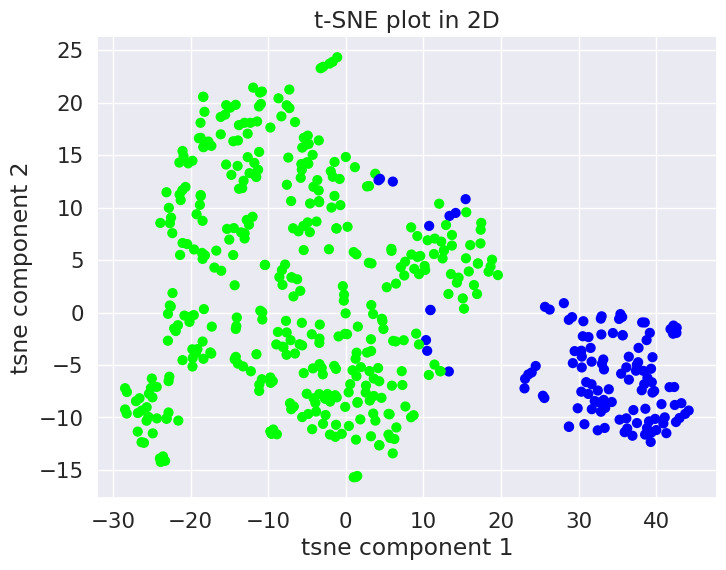

In [ ]:
# масштаб графика
plt.figure(figsize=(8,6))

# scatterplot (диаграмма рассеяния)
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# подписи осей/заголовок
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

## UMAP

In [ ]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(X)
X_umap = um.transform(X)

# преобразуем в датафрейм
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

print(umap_df.shape)
umap_df.head()

(509, 2)


,umap comp. 1,umap comp. 2
0,-4.538405,8.292212
1,4.882915,10.123878
2,4.831837,10.088654
3,-3.922275,9.525785
4,-3.882084,9.498212


Text(0, 0.5, 'umap component 2')

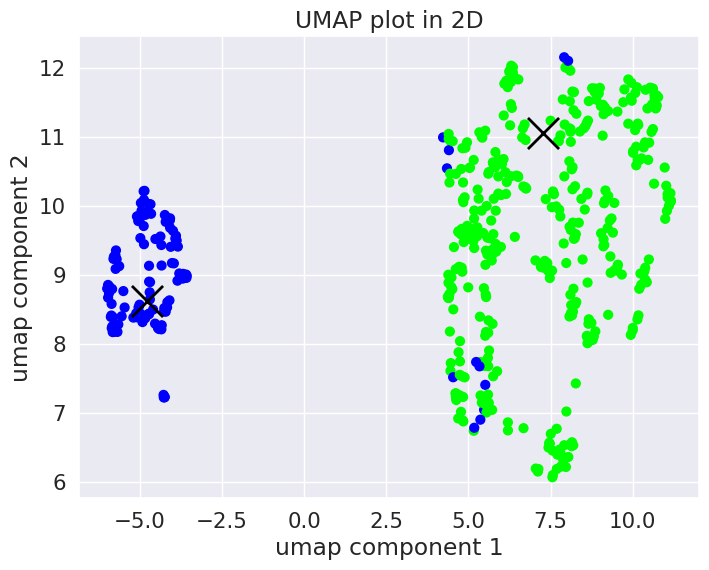

In [ ]:
# масштаб графика
plt.figure(figsize=(8,6))

# scatterplot (диаграмма рассеяния)
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# центроиды
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x", s=500, linewidths=2, color="black")

# подписи осей/заголовок
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

## Выводы

Визуализация методом PCA наиболее лучшим образом распределила данные на два кластера.
Остальные методы присваивали одному кластеру значения, которые должны были попасть в другой кластер.

In [ ]:
!jupyter nbconvert --to html clustering.ipynb

[NbConvertApp] Converting notebook clustering.ipynb to html
[NbConvertApp] Writing 1031924 bytes to clustering.html
